In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [49]:
tips = pd.read_csv('tips (data for regression problem).csv')
print(tips.keys())
tips.head()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
# Many of the coloumn like 'sex', 'smoker' etc contains Categorical Data
# So it needs to be Encoded.

In [53]:
tips["sex"] = tips["sex"].map({"Female" : 0, "Male" : 1})
tips["smoker"] = tips["smoker"].map({"Yes" : 1, "No" : 0})
tips["day"] = tips["day"].map({"Thur" : 0, "Fri": 1, "Sat": 2, "Sun": 3})
tips["time"] = tips["time"].map({"Lunch" : 0, "Dinner" : 1})

In [55]:
# Encoded 

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [91]:
x = np.array(tips[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(tips["tip"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# LETS TRY WITH LINEAR REGRESSION

In [61]:
solve = LinearRegression()
solve.fit(xtrain , ytrain)

LinearRegression()

In [93]:
ypred=solve.predict(xtest)
r2=r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
print("R2 Score : ", r2, " mse score : ", mse)

R2 Score :  0.44293996874899  mse score :  0.6963090766605347


In [ ]:
#Testing with Custom Data

In [65]:
input = [[21 , 1, 1, 3, 2, 5]]
solve.predict(input)

array([3.45600224])

In [ ]:
# Now doing with Various other Linear Models with For Loop
# Firstly i created an array of Various Model and then i applied
# For loop

In [67]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),("svr",SVR())
      ,("KNN",KNeighborsRegressor())]
for name, model in models:
    model.fit(xtrain , ytrain)
    ypred=model.predict(xtest)
    r2=r2_score(ytest, ypred)
    print("for ",name," model", "r2 : ",r2)

for  Linear Regression  model r2 :  0.44293996874899
for  Ridge Regression  model r2 :  0.44499632661380983
for  Lasso Regression  model r2 :  0.5467115210170849
for  Decision Tree  model r2 :  -0.10656087676412196
for  Random Forest  model r2 :  0.295343900821449
for  svr  model r2 :  0.5733266317063533
for  KNN  model r2 :  0.3042953007968996


In [69]:
# SCATTER PLOT

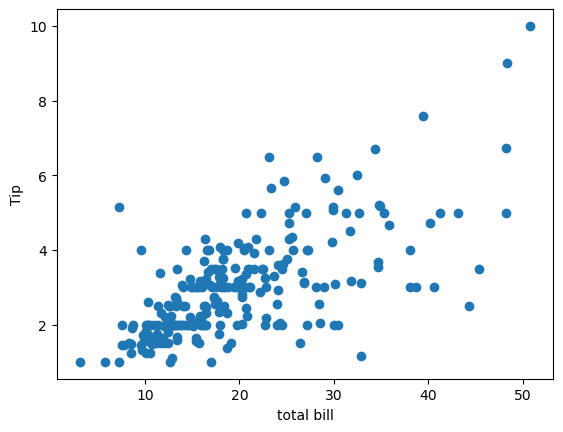

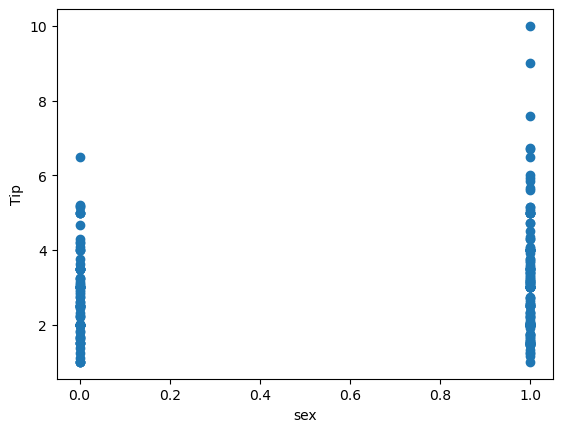

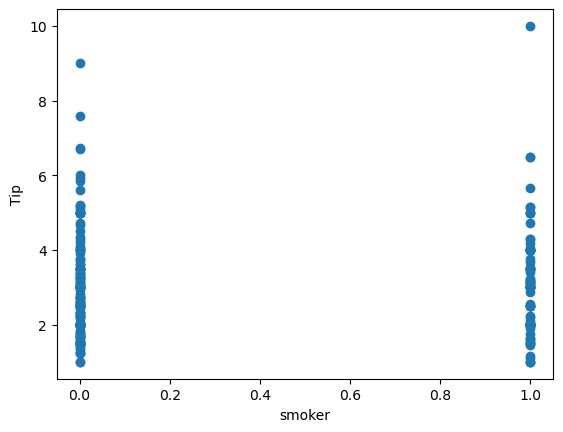

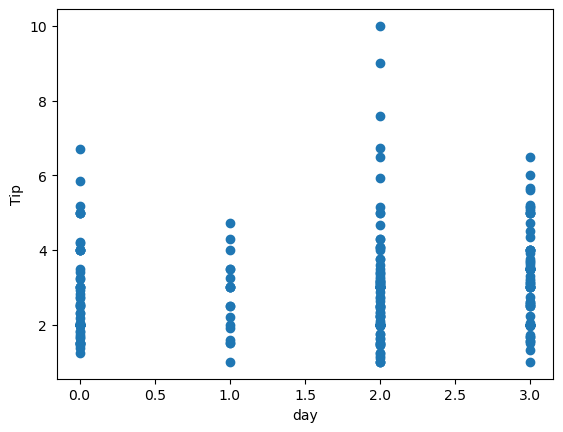

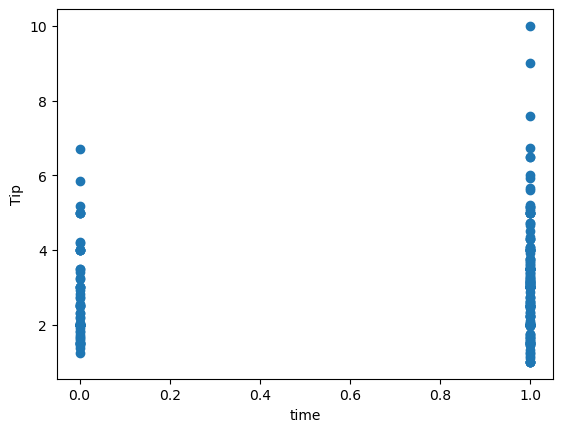

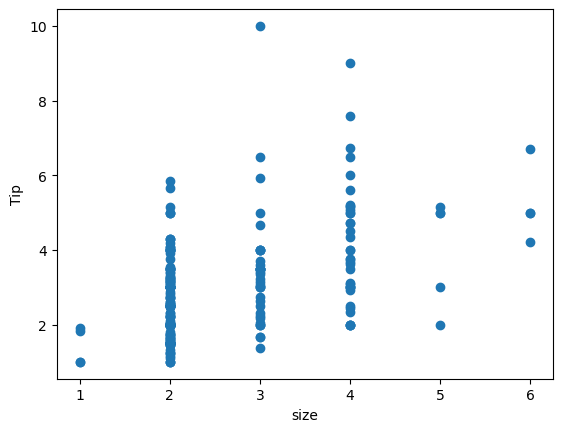

In [71]:
predictors = [("total bill",tips['total_bill']),("sex", tips['sex']),("smoker", tips['smoker']),("day", tips['day']),
              ("time", tips['time']),("size", tips['size'])]
for n,p in predictors:
    plt.scatter(p, tips['tip'])
    plt.xlabel(n)
    plt.ylabel('Tip')
    plt.show()

In [72]:
# Pair Plot for Multiple Features

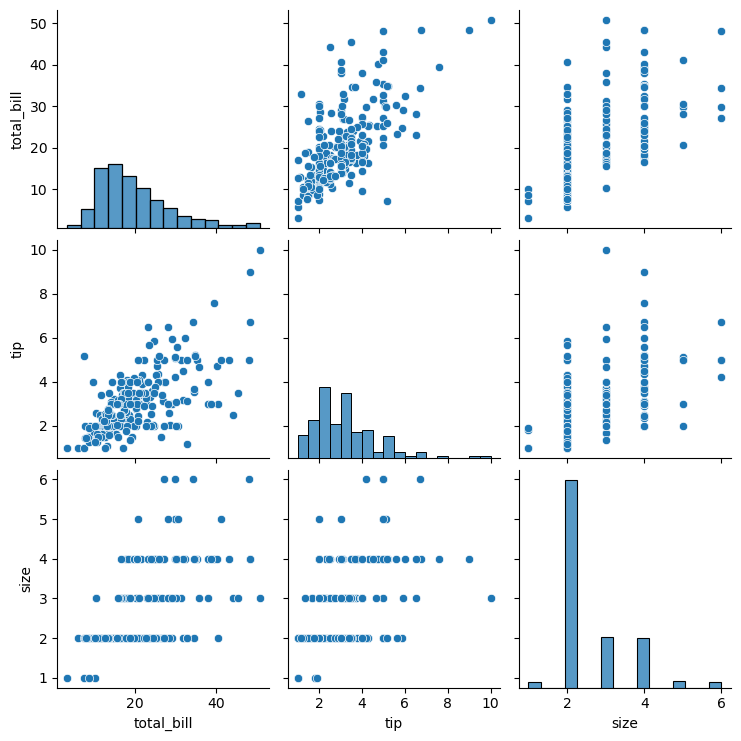

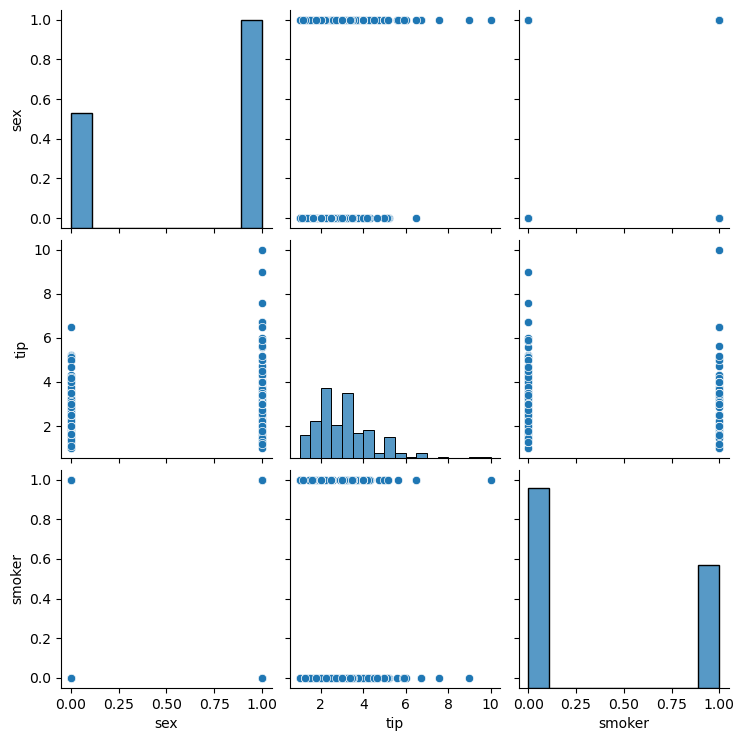

In [75]:
sns.pairplot(tips[['total_bill', 'tip', 'size']])
plt.show()
sns.pairplot(tips[['sex', 'tip', 'smoker']])
plt.show()

In [76]:
#  Correlation Matrix (Heatmap)

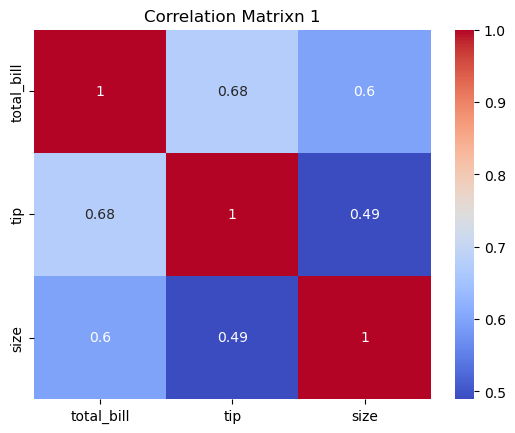

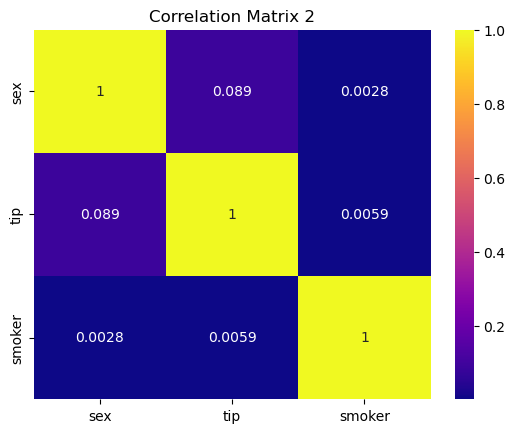

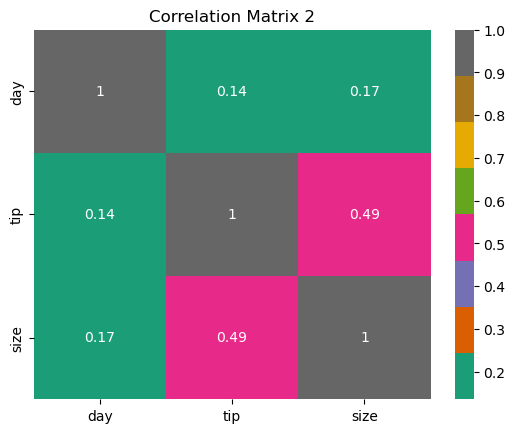

In [79]:
corr_matrix = tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrixn 1')
plt.show()
corr_matrix = tips[['sex', 'tip', 'smoker']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix 2')
plt.show()
corr_matrix = tips[['day', 'tip', 'size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Dark2')
plt.title('Correlation Matrix 2')
plt.show()

In [81]:
# Statistical Test for Linearity(Rainbow Test)

In [83]:
predictors = [tips['total_bill'], tips['sex'],tips['smoker'],tips['day'], tips['time'],tips['size']]
for p in predictors:
    X = sm.add_constant(tips['total_bill'])
    Y = p
    model = sm.OLS(Y, X).fit()
    rainbow_stat, rainbow_p_value = linear_rainbow(model)
    print(f'Rainbow test statistic ": {rainbow_stat}, p-value: {rainbow_p_value}')

Rainbow test statistic ": 2.413767715036403, p-value: 9.897194511394457e-07
Rainbow test statistic ": 0.9596359860385912, p-value: 0.5896472891352866
Rainbow test statistic ": 1.0967661477556323, p-value: 0.30632609082077683
Rainbow test statistic ": 0.7217406121305135, p-value: 0.9630389085869561
Rainbow test statistic ": 0.6858476996611753, p-value: 0.9805475303218094
Rainbow test statistic ": 0.7869159695051342, p-value: 0.9056759819539304


In [85]:
# Residuals Plot

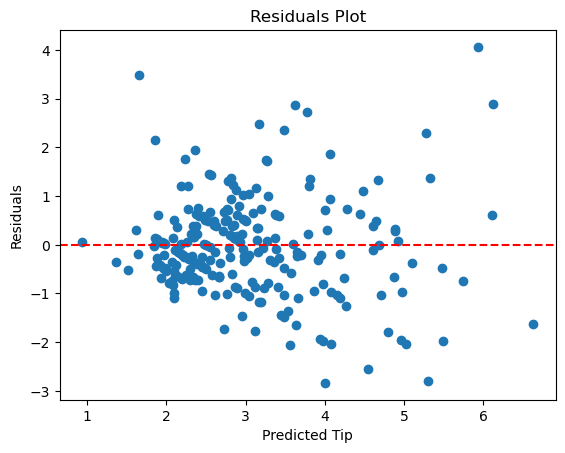

In [87]:
#for linear regression
predicted = solve.predict(x)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

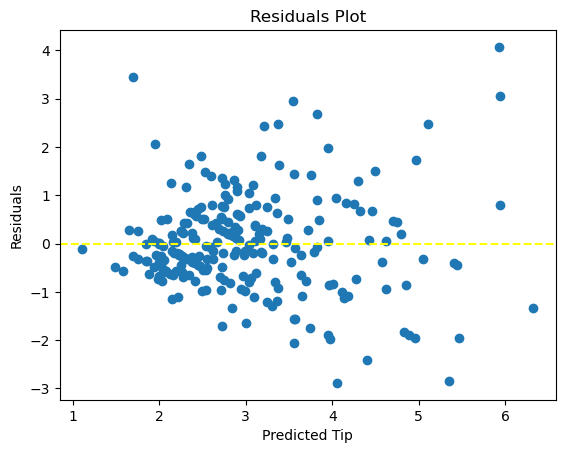

In [89]:
#for Ridge
newM= Ridge()
newM.fit(x,y)
predicted = newM.predict(x)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='YELLOW', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()